## Basic linear Regression

In [1]:
import torch

In [2]:
# Init weights and biases
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True) 

In [3]:
# Create forward function
def forward(x):
    y = w*x + b
    return y

In [4]:
# Create x tensor as Input
x = torch.Tensor([2])
forward(x)

tensor([7.], grad_fn=<AddBackward0>)

In [5]:
# Create multiple x tensor as Input 
x = torch.Tensor([[2],[4],[7]])
forward(x)

tensor([[ 7.],
        [13.],
        [22.]], grad_fn=<AddBackward0>)

## Linear regression 1 perceptron

In [6]:
import torch
from torch.nn import Linear

In [7]:
torch.manual_seed(1)

In [8]:
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [9]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [10]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


## Create Class for prediction

In [11]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [12]:
class LR(nn.Module):
    def __init__(self, input_size, putput_size):
        super().__init__()
        self.linear = nn.Linear(input_size, putput_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [13]:
torch.manual_seed(1)
model = LR(1, 1,)
print('Parameter:',list(model.parameters()))

Parameter: [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [14]:
x = torch.tensor([[1.0], [2.0]])
print('Prediction:',model.forward(x))

Prediction: tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


## Data sets

torch.Size([100, 1])
tensor([[-15.2560],
        [ -7.5023],
        [ -6.5398],
        [-16.0948],
        [ -1.0017]])


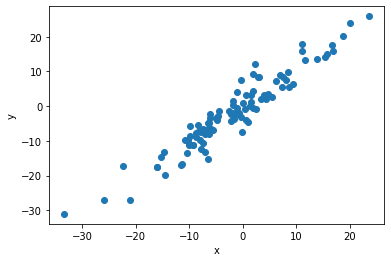

In [15]:
torch.manual_seed(1)
X = torch.randn(100,1)*10 # Rows: 100, Columns: 1
y = X + 3*torch.randn(100,1)
print(X.shape)
print(X[0:5])
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
class LR(nn.Module):
    def __init__ (self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred
    def get_params(self):
        return (self.linear.weight[0][0].item(), self.linear.bias[0].item())

In [17]:
def plot_fit(title):
    plt.title = title
    w1, b1 = model.get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

In [18]:
model = LR(1,1)
[w, b] = model.parameters()
print('weight',w,'\nbias:',b)

weight Parameter containing:
tensor([[0.9846]], requires_grad=True) 
bias: Parameter containing:
tensor([-0.2130], requires_grad=True)


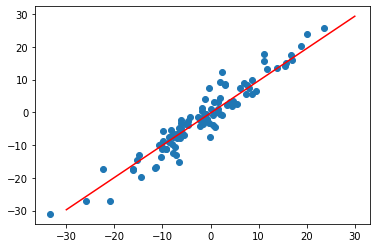

In [19]:
plot_fit("Initial Model")

In [20]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [21]:
epochs = 100
losses = []
for i in range (epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    print("Epoch:", i, "Loss:", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad() # Reset gradient in (Mini batch cause pytorch correct weight and delivetive in backward so should reset weight in list)
    loss.backward()   # Calculate gradient(delivertive)
    optimizer.step()  

Epoch: 0 Loss: 10.461551666259766
Epoch: 1 Loss: 10.441458702087402
Epoch: 2 Loss: 10.422207832336426
Epoch: 3 Loss: 10.403764724731445
Epoch: 4 Loss: 10.386094093322754
Epoch: 5 Loss: 10.369162559509277
Epoch: 6 Loss: 10.352940559387207
Epoch: 7 Loss: 10.33740234375
Epoch: 8 Loss: 10.322510719299316
Epoch: 9 Loss: 10.308245658874512
Epoch: 10 Loss: 10.294576644897461
Epoch: 11 Loss: 10.28148078918457
Epoch: 12 Loss: 10.268933296203613
Epoch: 13 Loss: 10.256913185119629
Epoch: 14 Loss: 10.245394706726074
Epoch: 15 Loss: 10.234357833862305
Epoch: 16 Loss: 10.223782539367676
Epoch: 17 Loss: 10.213652610778809
Epoch: 18 Loss: 10.203946113586426
Epoch: 19 Loss: 10.1946439743042
Epoch: 20 Loss: 10.185731887817383
Epoch: 21 Loss: 10.177194595336914
Epoch: 22 Loss: 10.169012069702148
Epoch: 23 Loss: 10.161172866821289
Epoch: 24 Loss: 10.15366268157959
Epoch: 25 Loss: 10.146465301513672
Epoch: 26 Loss: 10.139570236206055
Epoch: 27 Loss: 10.132962226867676
Epoch: 28 Loss: 10.126630783081055
Epo

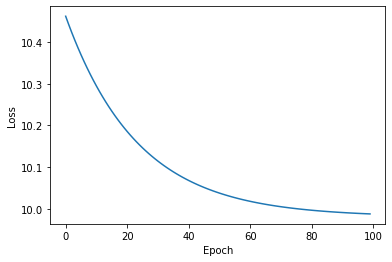

In [22]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

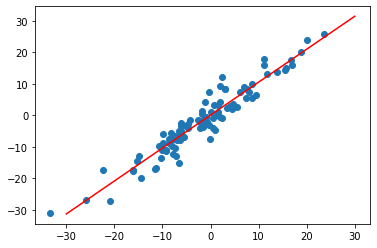

In [23]:
plot_fit("Trained Model")